In [1]:
#let's import neccery libraries
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('task_4.csv')

In [9]:
data.head()

,subscriber_id,birthday,gender,handset_vendor,region,price_plan,price_plan_monthly_fee,ARPU
0,1,1975-04-19,MALE,Huawei,Brestskaya,Plan1,20.712,43.0752
1,2,1974-02-03,MALE,Samsung,Minsk,Plan1,20.712,20.7120
2,3,1968-03-09,FEMALE,Huawei,Gomelskaya,Plan1,20.712,20.7120
3,4,2001-02-12,MALE,Xiaomi,Mogilevskaya,Plan3,12.312,17.5440
4,5,1983-01-16,MALE,Samsung,Minsk,Plan3,12.312,12.3120


1. Приведите описательную статистику по абонентской плате и среднему счету,представленные в таблице.

In [10]:
print(data[['price_plan_monthly_fee','ARPU']].describe())

       price_plan_monthly_fee         ARPU
count             1000.000000  1000.000000
mean                16.721760    22.582844
std                  3.917098     8.241737
min                 11.232000    11.352000
25%                 12.312000    16.062400
50%                 14.808000    20.899200
75%                 20.712000    26.668400
max                 20.712000    49.519500


2. Добавьте поле с указанием возраста абонента (полных лет, целое число)

In [11]:
from datetime import datetime
now = datetime.now()
data['birthday'] = data['birthday'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
data ['Age'] = data['birthday'].apply(lambda x: now.year - x.year)

In [12]:
data.head()

,subscriber_id,birthday,gender,handset_vendor,region,price_plan,price_plan_monthly_fee,ARPU,Age
0,1,1975-04-19,MALE,Huawei,Brestskaya,Plan1,20.712,43.0752,46
1,2,1974-02-03,MALE,Samsung,Minsk,Plan1,20.712,20.7120,47
2,3,1968-03-09,FEMALE,Huawei,Gomelskaya,Plan1,20.712,20.7120,53
3,4,2001-02-12,MALE,Xiaomi,Mogilevskaya,Plan3,12.312,17.5440,20
4,5,1983-01-16,MALE,Samsung,Minsk,Plan3,12.312,12.3120,38


3. Добавьте поле с флагом для тех абонентов, у кого счет за месяц более чем на 15%
превышает размер абонентской платы (1 - превышает более чем на 15%, 0 – не
превышает).

In [13]:
data ['flag'] = np.where(data['ARPU'] > data['price_plan_monthly_fee']*1.15, 1, 0)

In [14]:
data.head()

,subscriber_id,birthday,gender,handset_vendor,region,price_plan,price_plan_monthly_fee,ARPU,Age,flag
0,1,1975-04-19,MALE,Huawei,Brestskaya,Plan1,20.712,43.0752,46,1
1,2,1974-02-03,MALE,Samsung,Minsk,Plan1,20.712,20.7120,47,0
2,3,1968-03-09,FEMALE,Huawei,Gomelskaya,Plan1,20.712,20.7120,53,0
3,4,2001-02-12,MALE,Xiaomi,Mogilevskaya,Plan3,12.312,17.5440,20,1
4,5,1983-01-16,MALE,Samsung,Minsk,Plan3,12.312,12.3120,38,0


4. Визуализируйте и проанализируйте распределение абонентов по:

*  возрасту и счету

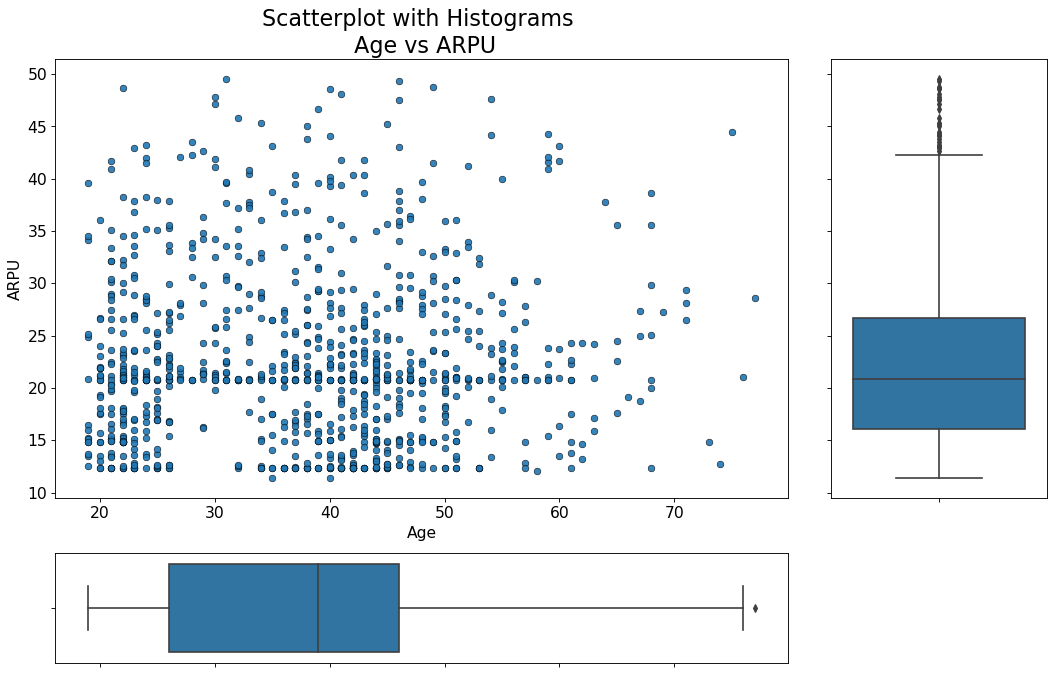

In [67]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('Age', 'ARPU', alpha=.9, data=data, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(data.ARPU, ax=ax_right, orient="v")
sns.boxplot(data.Age, ax=ax_bottom, orient="h")


ax_bottom.set(xlabel='')
ax_right.set(ylabel='')


ax_main.set(title='Scatterplot with Histograms \n Age vs ARPU', xlabel='Age', ylabel='ARPU')


ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

Можно заметить интересный факт, что у людей 30 лет  на счете у больше 20 рублей.
На мой взгляд интересно посмотреь на распределение платы за тарифный план и возраст.

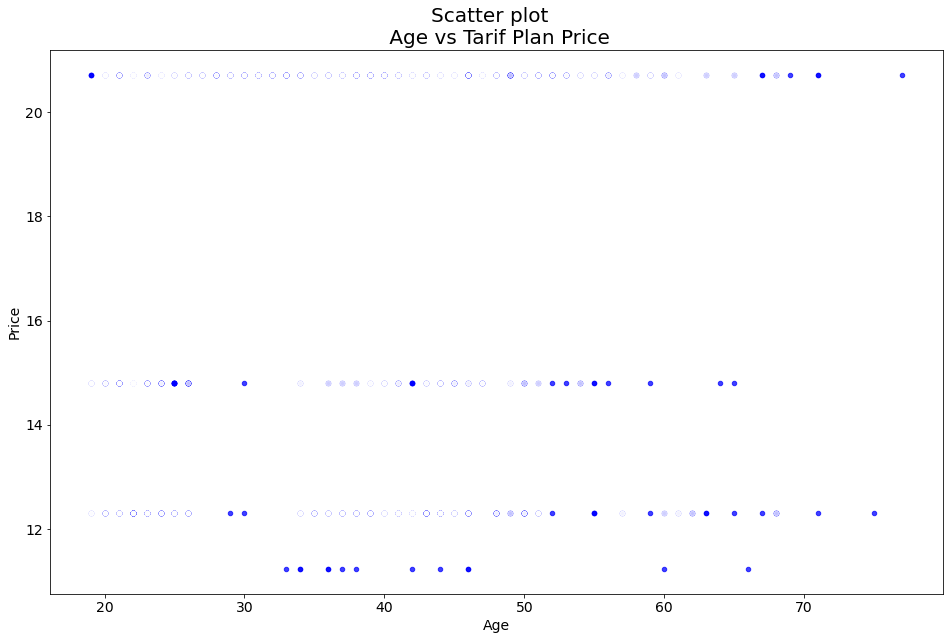

In [99]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(data[data.flag==1].Age, data[data.flag==1].price_plan_monthly_fee, s = 20, color = 'blue', alpha = 0.75)
ax.scatter(data[data.flag==0].Age, data[data.flag==0].price_plan_monthly_fee, s = 20, color = 'white', alpha = 0.75)
ax.set(title='Scatter plot  \n Age vs Tarif Plan Price', xlabel='Age', ylabel='Price')
ax.title.set_fontsize(20)
for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)

   

А также давайте посмотрим boxplot возраста в разрезе тарифного плана. Узнаем "целевую " аудиторию тарифных планов

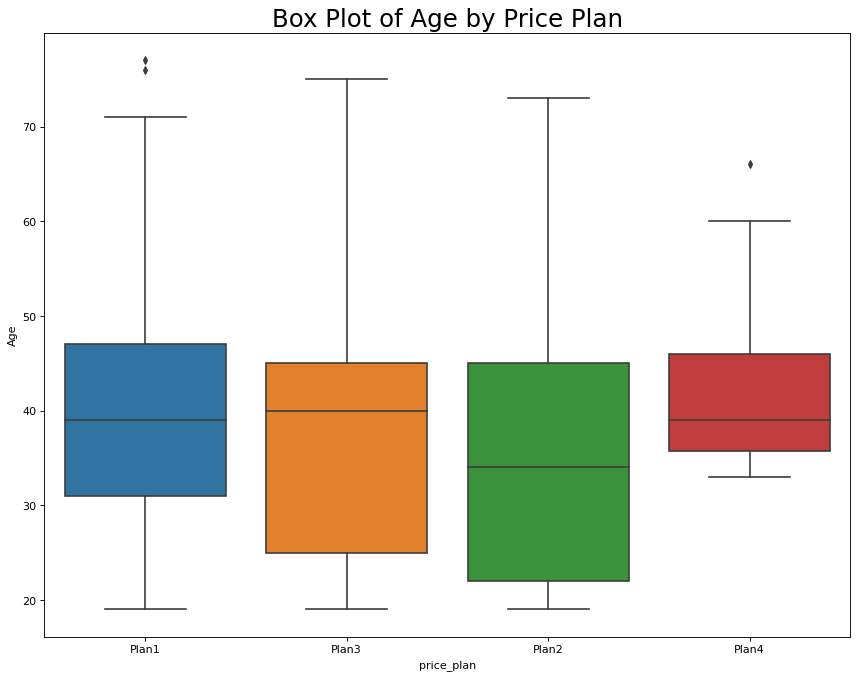

In [104]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='price_plan', y='Age', data=data, notch=False)
# Decoration
plt.title('Box Plot of Age by Price Plan', fontsize=22)
plt.show()

Распределение по областям и полу:

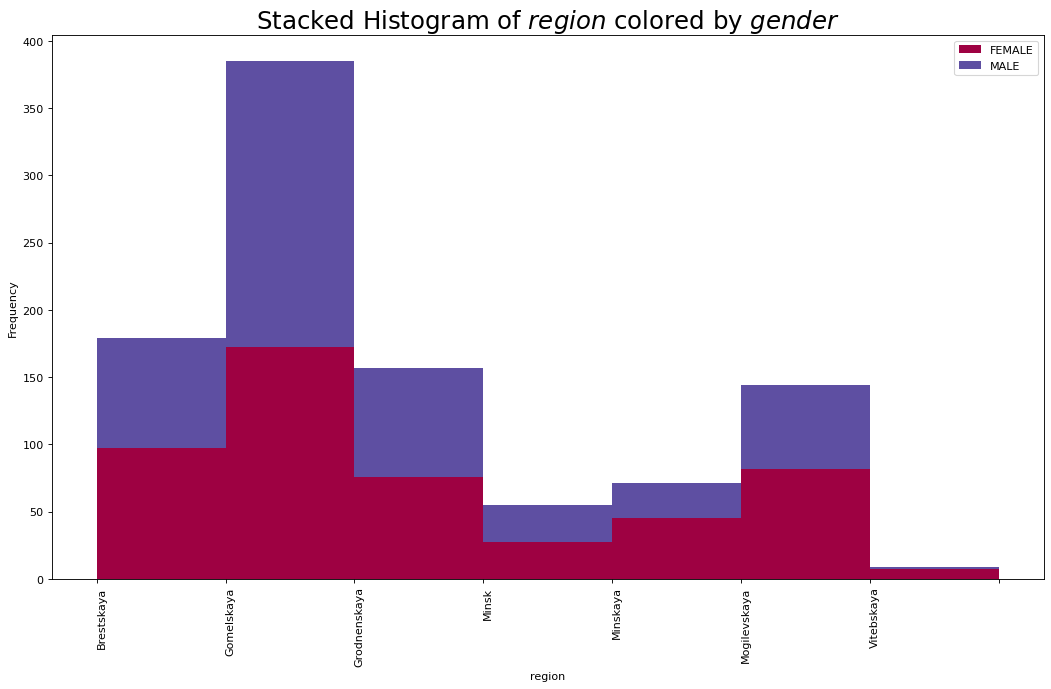

In [109]:
# Prepare data
x_var = 'region'
groupby_var = 'gender'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(data[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins, labels=np.unique(data[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

Распределение абонентов по счету, тарифу и марке телефона с отражением степени разброса данных по счету
наиболее подходящим на Ваш взгляд типом диаграммы.

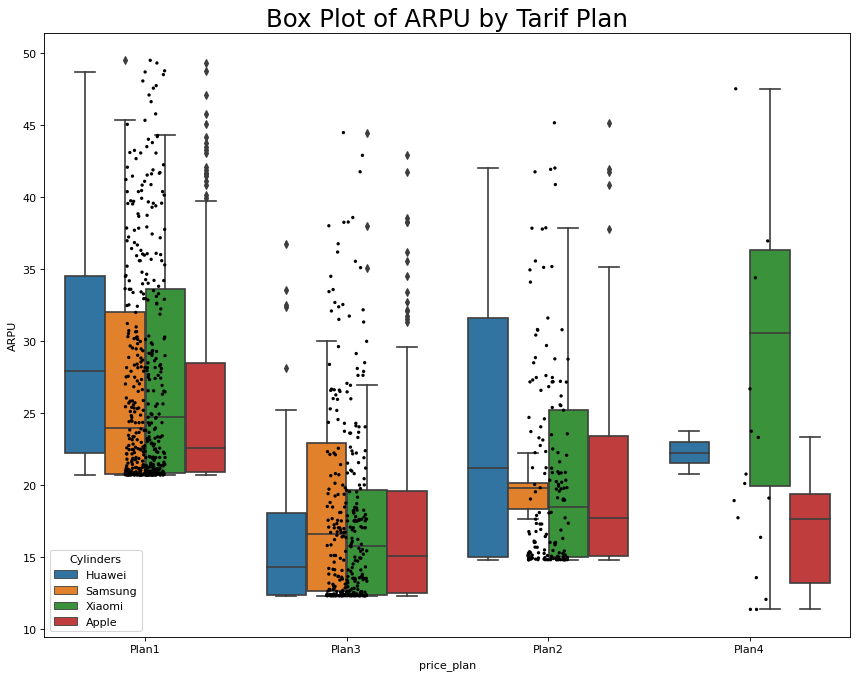

In [15]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='price_plan', y='ARPU', data=data, hue='handset_vendor')
sns.stripplot(x='price_plan', y='ARPU', data=data, color='black', size=3, jitter=1)

#for i in range(len(data['price_plan'].unique())-1):
#    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of ARPU by Tarif Plan', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

Выбрала данных график, потому что в данной ситуации можно сделать много выводов и видны разбросы данных.
   1) Явно видно, что первый тарифный план наиболее популярен.
   
   2) Интересное наблюдение, что самсунгов среди тарифного плана № 4 не представлено. При этом, вспоминая графики выше, этот тарифный план не приобретает молодежь.
   
   3) Хотя и тарифный план №4 самый дешевый, на счету денег лежит в среднем больше. Возможно это связано со способом списывания денег со счета данного тарифа. 
   
   4) В среднем у держателей Айфонов меньше денег на счете на каждом тарифном плане.
